Setting Up the Environment
-------------



In [6]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras import backend as K

Data Preparation
-----------

In [7]:
# Load the Breast Cancer dataset
breast = load_breast_cancer()
X, y = breast.data, breast.target

# One-hot encode the target labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

Data Distribution
-----------

Splitting the Data
------------

In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Build up the Model


Tanh A.F
--------

In [9]:
# Define the model architecture
model = Sequential([
    Dense(16, activation='tanh', input_shape=(X_train.shape[1],)),
    Dense(2, activation='softmax')  # Output layer with 2 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Training
------------

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=0)

Performance Evaluation
------------

In [11]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.98


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


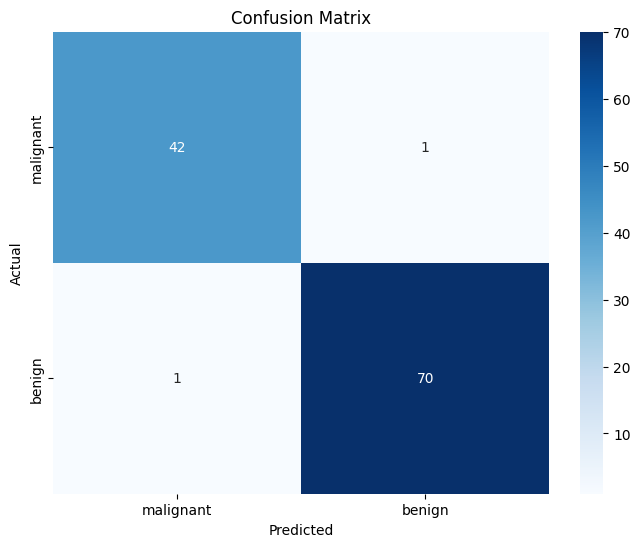

In [12]:

# Make predictions on the test data
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=breast.target_names, yticklabels=breast.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [13]:
#We define a function for easy code reusability
def train_with(algo):
  model = Sequential([
    Dense(16, activation=algo, input_shape=(X_train.shape[1],)),
    Dense(2, activation='softmax')  # Output layer with 2 classes
])

  # Compile the model

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  # Train the model

  history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=0)

  test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
  print(f"Test Accuracy: {test_accuracy:.2f}")

  # Make predictions on the test data
  y_pred_prob = model.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)
  y_true = np.argmax(y_test, axis=1)

  conf_matrix = confusion_matrix(y_true, y_pred)

  # Visualize the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=breast.target_names, yticklabels=breast.target_names)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

relu algorithm



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.97
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


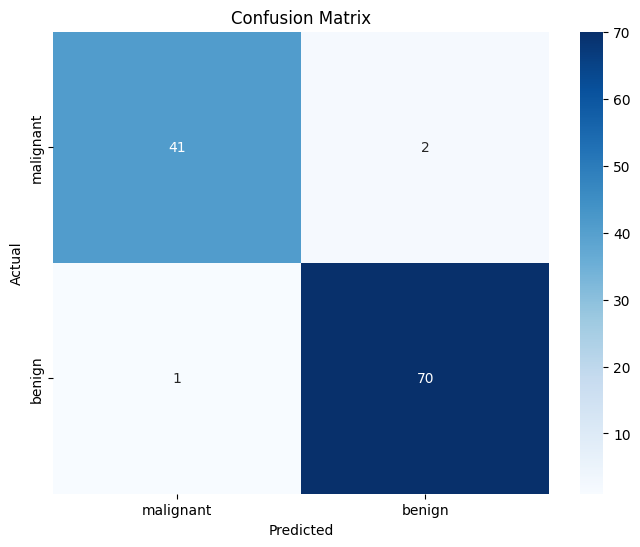

In [14]:
train_with("relu")

Sigmoid A.F

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.98
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


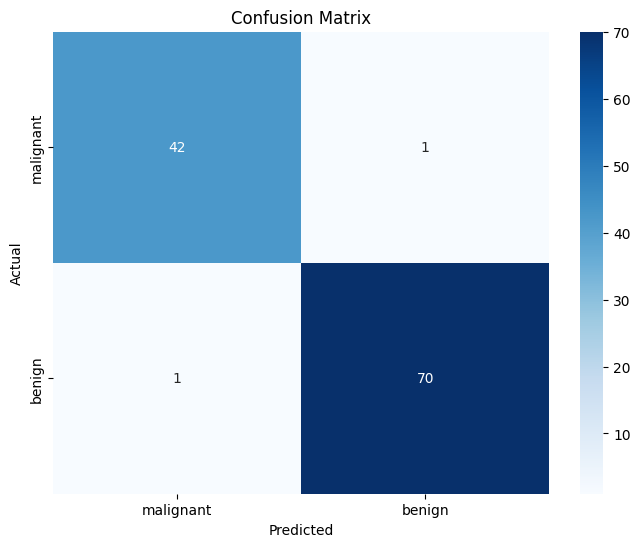

In [15]:
train_with('sigmoid') #thomas shelby sigma

Identity Activation Function

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 0.98
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


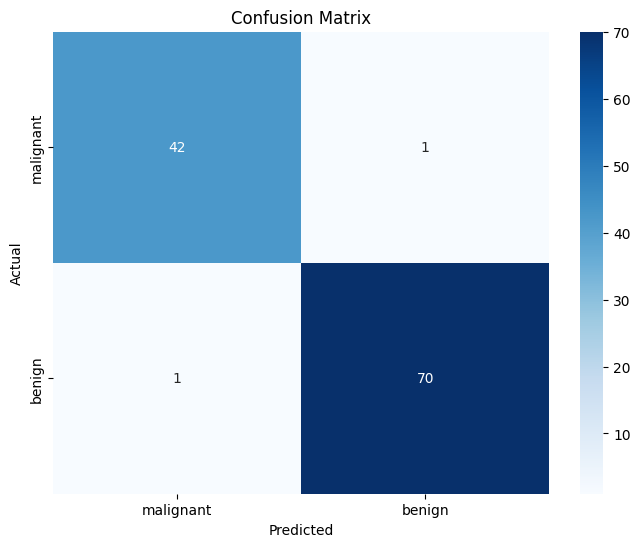

In [16]:
train_with('linear')

Step A.F

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:678: UserWarning: Gradients do not exist for variables ['kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Test Accuracy: 0.93
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


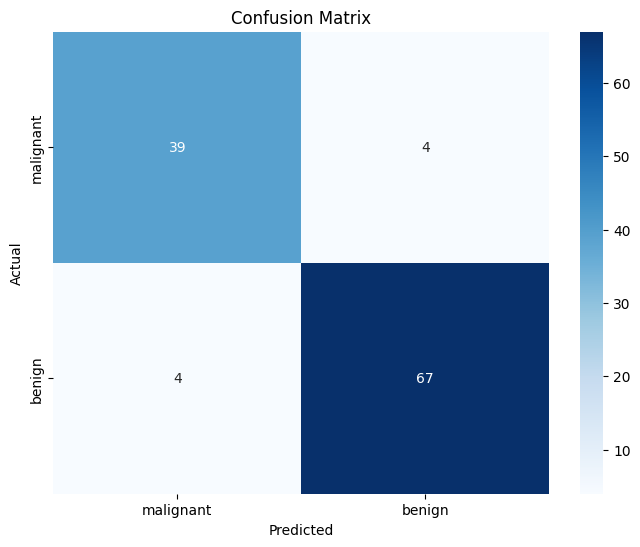

In [17]:
def step_activation(x):
    return K.cast(K.greater_equal(x, 0), K.floatx())

train_with(step_activation)